                                                         **Clustering**

Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Answer- K-Means is a partitioning method that requires a pre-defined number of clusters and aims to create spherical clusters, while Hierarchical Clustering builds a tree-like hierarchy of nested clusters, allowing for the discovery of structure and the determination of cluster count after analysis. K-Means is efficient for large datasets but assumes spherical cluster shapes, whereas Hierarchical Clustering is computationally intensive but more flexible for complex data structures and produces a dendrogram for visualization.

| Aspect                  | K-Means                               | Hierarchical Clustering               |
| ----------------------- | ------------------------------------- | ------------------------------------- |
| Number of Clusters      | Must specify before running           | Decided post-hoc via dendrogram       |
| Cluster Shape           | Spherical, similar sizes              | Flexible, varied shapes               |
| Efficiency              | High, good for large datasets         | Low, best for small–medium datasets   |
| Interpretability        | Easy (centroids)                      | Rich but complex (dendrogram tree)    |
| Flexibility in distance | Limited (e.g., Euclidean)             | High (any distance/similarity metric) |
| Reproducibility         | May vary due to random initialization | Deterministic, same output each time  |
| Best When...            | Large data, known $k$, fast results   | Exploring hierarchy, deep structure   |


Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

The purpose of the Silhouette Score is to evaluate the quality of a clustering model by measuring both the cohesion within clusters and the separation between clusters. It provides a quantitative score for each data point and the overall dataset, where higher scores (closer to +1) indicate that data points are well-matched to their own cluster and well-separated from other clusters, signifying better-defined and more effective clustering.

**How it Works**

**For each data point, the Silhouette Score calculates two main values:**

1.a(i):

The average distance to all other data points within the same cluster (intra-cluster distance). A smaller value means the point is well-matched to its cluster.

2.b(i):

The average distance to all data points in the nearest neighboring cluster (nearest-cluster distance). A larger value indicates better separation from other clusters.

The silhouette score for a data point is then calculated as (b(i) - a(i)) / max(a(i), b(i)). A higher score means the point is closer to its own cluster and further from others.

**Interpreting the Score**


* +1: The data point is far away from neighboring clusters, indicating perfect clustering.


*  0: The data point is on or very close to the decision boundary between two neighboring clusters.


* -1: The data point has likely been assigned to the wrong cluster.

**Why it's Used**

**Internal Validation:**

It's an internal validation metric for clustering algorithms, which is crucial because clustering is an unsupervised learning task without true labels to validate against.

**Assessing Clustering Effectiveness:**

It helps determine if the clusters are well-defined, internally homogeneous, and clearly separated from each other.

**Determining the Optimal Number of Clusters:**

By calculating the average silhouette score for different values of k (the number of clusters), the optimal k can be found where the average score is maximized.



Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Answer- The two core parameters of DBSCAN are epsilon (ε), which defines the radius to identify neighboring points, and MinPts, which sets the minimum number of points needed to form a dense region (a core point). Epsilon controls the scale of clusters, with a larger ε merging more points into larger clusters, while a smaller ε can create more clusters with fewer points. MinPts influences the algorithm's sensitivity to noise; a larger MinPts value leads to fewer, more robust clusters, whereas a smaller MinPts can generate more, smaller clusters and identify more outliers.

**Epsilon (ε)**

**Definition:**

The maximum distance between two points for one to be considered a neighbor of the other.

**Influence:**

Larger ε: Groups more points together, leading to fewer but larger clusters. It can also reduce the number of identified noise points.
Smaller ε: Can result in more clusters with fewer points each. It increases the sensitivity to noise, potentially identifying more points as outliers.

**Selection:**

Can be determined by analyzing a k-distance graph to find an "elbow" point, which indicates a good balance for ε.

**MinPts**

**Definition:**

The minimum number of points required within an ε-neighborhood for a point to be classified as a core point, signifying a dense region.

**Influence:**

Larger MinPts: Results in fewer, more robust clusters and a higher chance of points being labeled as noise.
Smaller MinPts: Leads to more, smaller clusters and potentially more noise points.

**Selection:**

A common guideline is to set MinPts ≥ D + 1, where D is the number of dimensions in the dataset. Setting MinPts to 1 or 2 can lead to results similar to hierarchical clustering.

**How They Work Together**

**Cluster Formation:**

The algorithm starts by picking an unvisited point. It checks its ε-neighborhood. If the number of points in this neighborhood is at least MinPts, the point is a core point, and a new cluster is formed.

**Handling Noise:**

Points that are not considered core points (i.e., they don't meet the MinPts requirement in their ε-neighborhood) can be classified as noise or eventually become part of a cluster if they are found within the ε-neighborhood of another dense region.

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Answer- Feature scaling is vital for K-Means and DBSCAN because they are distance-based algorithms, and features with larger scales would dominate distance calculations, leading to biased results and incorrect cluster formation. Scaling ensures that all features contribute equally to determining the distance between data points, which is crucial for accurate and meaningful clusters.

**Why it's important for distance-based algorithms**

**Euclidean Distance Dominance:**

Both K-Means and DBSCAN rely on distance metrics like Euclidean distance to group data points. The formula for Euclidean distance involves summing squared differences across features, meaning that a feature with a large range or magnitude will have a much greater impact on the overall distance calculation than a feature with a smaller range.

**Feature Bias:**

Without scaling, a feature with a large numerical range (e.g., salary) will disproportionately influence the distance calculation compared to features with small ranges (e.g., age), effectively giving the large-range feature much more weight.

**Misleading Clusters:**

This dominance leads to clusters that are heavily influenced by the features with larger values, potentially obscuring the true underlying structure of the data and resulting in suboptimal or misleading clustering outcomes.

**How it affects K-Means and DBSCAN**

**K-Means:**

K-Means works by minimizing the distance of data points to their assigned cluster centroids. If features aren't scaled, the larger features will control the position of the centroids, leading to inaccurate cluster assignments and a distorted representation of groups.

**DBSCAN:**

DBSCAN groups points that are closely packed together based on density. If features aren't scaled, the density calculation can be skewed by features with large scales, potentially leading to an incorrect identification of core points and, consequently, clusters and noise points.

**The solution**

Feature Scaling Techniques: By applying techniques like standardization (mean=0, variance=1) or normalization (scaling to a range like 0-1), all features are brought to a similar scale. This allows the distance metric to give equal importance to each feature, ensuring a more balanced and accurate representation of data similarity for both K-Means and DBSCAN.

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

Answer- The Elbow Method is a visual technique for selecting the optimal number of clusters (k) in K-Means clustering by plotting the Within-Cluster Sum of Squares (WCSS) (inertia) against different values of 'k'. It helps identify the "elbow point," which is the point where adding more clusters no longer significantly reduces the WCSS, indicating a good balance between cluster cohesion and the number of clusters.

**How it Works**

**1.Run K-Means for different K values:**

The K-Means algorithm is applied to the data for a range of possible cluster numbers, from k=1 up to a chosen maximum.

**2.Calculate WCSS:**

For each 'k', the WCSS is calculated. WCSS is the sum of the squared distances of each data point to its assigned cluster's centroid.

**3.Plot the results:**

A curve is generated by plotting the calculated WCSS values on the y-axis against the corresponding number of clusters (k) on the x-axis.

**4.Identify the elbow point:**

The plot typically shows a sharp decrease in WCSS as 'k' increases initially, but the rate of decrease slows down and forms a bend or "elbow". This bend, or elbow, signifies the point where adding more clusters provides diminishing returns in terms of reducing the internal variance within clusters.

**5.Determine the optimal K:**

The value of 'k' at this elbow point is considered the optimal number of clusters for the dataset.

**How it Helps Determine the Optimal Number of Clusters**

**Balance:**

The elbow method provides a way to balance the trade-off between fitting the data well (low WCSS) and avoiding overfitting by creating too many small, inefficient clusters.

**Diminishing Returns:**

It shows the point at which additional clusters no longer contribute significantly to the overall tightness of the clusters.

**Visual Guidance:**

It offers a simple, intuitive visual method for choosing 'k' by looking for a distinct bend in the WCSS curve.

**Limitations**

**Ambiguous Elbows:**

In many real-world datasets, the elbow point may not be clearly defined, leading to ambiguity in selecting the optimal 'k'.

**Subjectivity:**

Identifying the "elbow" can sometimes be subjective, requiring careful visual inspection and potentially other metrics for confirmation.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
# 1. Generate Synthetic Data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

In [ ]:
# 2. Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

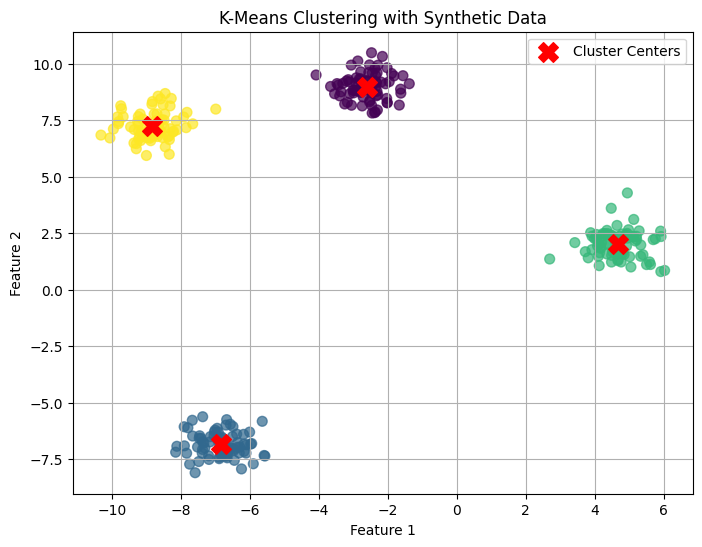

In [ ]:
# 3. Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering with Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

The following steps load the Wine dataset, apply StandardScaler for preprocessing, train a DBSCAN model, and then print the number of clusters found, excluding noise points.



In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
# Load the Wine dataset
wine = load_wine()
X = wine.data

In [ ]:

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train a DBSCAN model
# You may need to tune 'eps' and 'min_samples' based on your data and desired cluster characteristics.
# These values are examples and might not be optimal for the Wine dataset.
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
# Calculate the number of clusters found (excluding noise)
# Noise points are labeled as -1 by DBSCAN
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)


In [ ]:
print(f"Number of clusters found (excluding noise): {num_clusters}")


Number of clusters found (excluding noise): 0


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

The following steps demonstrate how to generate moon-shaped synthetic data, apply DBSCAN clustering, and visualize the identified outliers.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN


In [2]:
# 1. Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)


In [3]:
# 2. Apply DBSCAN
# Adjust eps and min_samples as needed for your specific data and desired outcome
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)


In [4]:
# 3. Identify outliers (noise points)
outliers = X[clusters == -1]
clustered_points = X[clusters != -1]


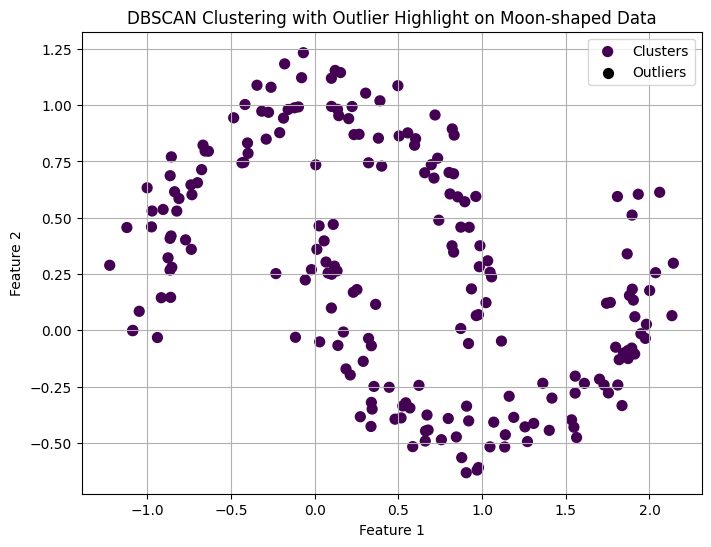

In [5]:
# 4. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(clustered_points[:, 0], clustered_points[:, 1], c=clusters[clusters != -1], cmap='viridis', s=50, label='Clusters')
plt.scatter(outliers[:, 0], outliers[:, 1], color='black', s=50, label='Outliers')
plt.title('DBSCAN Clustering with Outlier Highlight on Moon-shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

Answer-The following Python code demonstrates loading the Wine dataset, reducing its dimensionality to 2D using Principal Component Analysis (PCA), applying Agglomerative Clustering, and then visualizing the clustered data in a 2D scatter plot.

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


In [7]:
# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target # True labels for comparison/coloring if desired


In [8]:
# 2. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [10]:
# 3. Apply Agglomerative Clustering
# We choose 3 clusters as the Wine dataset is known to have 3 classes.
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(X_pca)

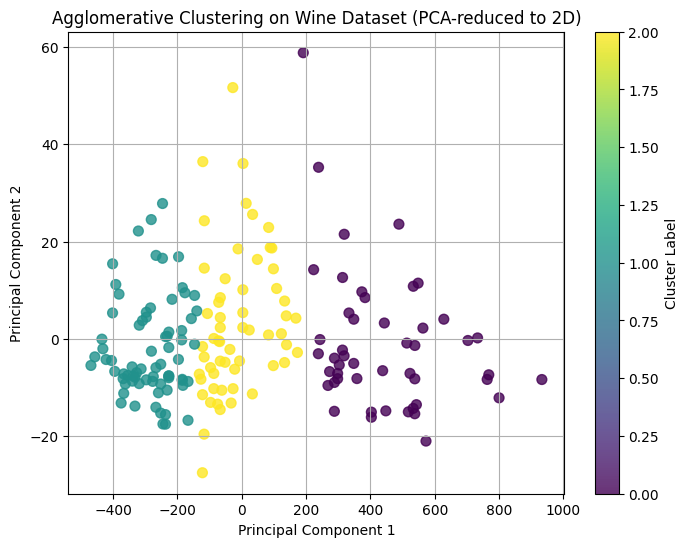

In [11]:
# 4. Visualize the result in 2D with a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering on Wine Dataset (PCA-reduced to 2D)')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?


Answer- Here’s a refined, data-science-driven workflow for customer segmentation via clustering—backed by industry best practices and real-world references.

**1.Choice of Clustering Algorithms**



**K-means / K-medoids**


* **Why choose:**

 * **K-means** is widely used due to simplicity and scalability, especially effective for large datasets to identify homogeneous purchasing behavior groups

 * **K-medoids** (like PAM) is more robust to outliers by using actual data points as centroids

**Gaussian Mixture Models (GMM)**

 * **Why:**

  * Captures probabilistic cluster membership and non-spherical cluster shapes—useful when customer behavior overlaps across segments


**Hierarchical (Agglomerative) Clustering / BIRCH**

 * **Why hierarchical:**

  * Offers a tree-based view of customer segments, helpful for exploring clusters at various granularity


 * **Why BIRCH:**

  * Scales efficiently to large datasets, handles noise well, and supports incremental clustering—ideal for evolving customer data in e-commerce

**DBSCAN (Density-Based)**

* **Why:**

 * Detects clusters of arbitrary shape and identifies outliers without needing to predefine cluster counts; great if you expect niche customer groups or outliers.

**2.Data Preprocessing**

1. **Handling Missing Values**

 * Replace or impute missing demographic or purchase data using mean/median, or use model-based imputation—depending on missingness pattern.

2. **Feature Engineering**

 * Derive RFM metrics: recency, frequency, monetary. Create normalized purchase counts across categories.

3. **Scaling**

 * Use StandardScaler or MinMaxScaler to give each feature equal weight; crucial for distance-based algorithms like K-means or hierarchical clustering.

4. **Categorical Encoding**

 * Apply one-hot or target encoding for categorical demographics (e.g., location, gender) as needed.

5. **Dimensionality Reduction (Optional)**

 * Techniques like PCA (for continuous features) or t-SNE/UMAP (for visualization or large feature sets) can simplify high-dimensional behavioral data into lower dimensions.

**3.Determining the Number of Clusters**

**For algorithms requiring k (e.g., K-means, K-medoids, GMM):**

 * **Elbow Method**

  * Plot WCSS (within-cluster sum of squares) against k and look for a point where the decrease slows—though note this can be subjective

 * **Silhouette Score**

  * Choose k that maximizes the average silhouette width, balancing cohesion and separation

 * **Gap Statistic**

  * Compares clustering performance to random data to select the optimal k

 * **Calinski–Harabasz Index**

  * Select k that maximizes the CH index, which evaluates cluster compactness and separation

 * **Advanced Methods**

  * X-means uses Bayesian Information Criterion (BIC) to estimate k more rigorously

  * Some research advises caution with the Elbow method and suggests using robust statistical alternatives

**For density-based or hierarchical methods:**

 * **DBSCAN** doesn't need k—tune parameters like eps and min_samples, and test cluster quality via domain knowledge.

 * **Hierarchical Clustering**

  * Use dendrograms to visually decide cluster levels.

**4.Benefits to the Marketing Team**

 * **Targeted Promotions**

  * By segmenting customers based on purchase behavior and demographics, you can tailor campaigns—for example, sending high-value bundle offers to frequent buyers.

 * **Personalized Messaging & Offers**

  * Create “archetypes” or personas to tailor product recommendations and communications, increasing engagement

 * **Resource Prioritization**

  * Focus marketing efforts on high-potential segments (e.g., loyal big spenders) to maximize ROI.

 * **Customer Lifetime Value (CLTV) Optimization**

  * Identify segments with high future revenue potential for upselling or retention programs.

 * **Actionable Insights**

  * Cluster profiles (e.g., “impulse young shoppers vs. value-seeking bulk buyers”) inform content, discounts, and resource allocation



  | Step                       | Action                                                                                                                     |
| -------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **1. Data Preprocessing**  | Clean, impute, scale, encode, engineer features (e.g., RFM).                                                               |
| **2. Algorithm Selection** | Start with K-means/GMM; validate with silhouette, gap, CH metrics. For complex patterns, try hierarchical/BIRCH or DBSCAN. |
| **3. Determine *k***       | Use Elbow, Silhouette, Gap Statistic, or CH Index; consider X-means.                                                       |
| **4. Evaluate & Refine**   | Visualize clusters, assess business relevance, adjust as needed.                                                           |
| **5. Apply & Communicate** | Present segment profiles (size, behavior, demographics), use clusters to inform promotions and strategy.                   |
